O problema consiste numa mochila, de capacidade
x, e um conjunto de n itens de
pesos p_1,p_2,...,p_n, e com valores v_1,v_2,...
,v_n associados. De acordo com esses valores, o
objetivo é alocar itens na mochila sem repeti-
los, respeitando o peso máximo de cada mochila,
encontrando ainda, o maior valor possível. Estamos utilizando uma mochila binária que receberá o valor 1 (um) se o
item j for alocado ao recipiente i, caso contrário, será
0 (zero). Pelo que li na literatura, existem algumas formas de se resolver o problema da mochila, algumas delas são, Simulated
Annealing, Busca Tabu, Algoritmos Genéticos, Greedy Randomized
Adaptive Search Procedure - GRASP, Variable
Neighborhood Search - VNS e Redes Neurais. Neste notebook estaremos utilizando a Busca Tabu que, por definição, é uma metaheurística que guia um
algoritmo de busca local, de maneira a permitir a
exploração contínua dentro de um espaço de busca. 

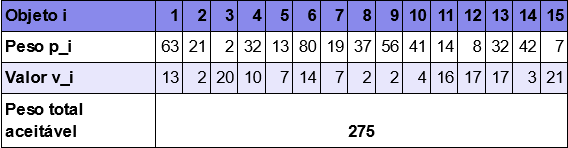



In [95]:
def VizinhoMelhorAvaliado(avaliacaoVizinhos, listaTabu, melhorSolucao, vizinhos):
	avaliacaoMax = max(avaliacaoVizinhos)
	prox = 0
	bitProibido = -1
	if len(listaTabu) != 0:
		bitProibido = listaTabu[0]
	for i in range(0, len(avaliacaoVizinhos)):
		if avaliacaoVizinhos[i] == avaliacaoMax:
			prox = i
			break
	if bitProibido != -1:
		proxBit = CalcMovimentoProibido(melhorSolucao, vizinhos[prox])
		if proxBit == bitProibido:
			melhorPosicao = 0
			for i in range(1, len(avaliacaoVizinhos)):
				if i != proxBit:
					if avaliacaoVizinhos[i] > avaliacaoVizinhos[melhorPosicao]:
						melhorPosicao = i
			return melhorPosicao 
	return prox

def CalcAvaliacao(total, mochila, totalAceitavel):
	peso_p_i = 0
	valor_v_i = 0
	for i in range(0, len(total)):
		peso_p_i += total[i] * mochila[i][0]
		valor_v_i += total[i] * mochila[i][1] 
	avaliacao = valor_v_i * (1 - max(0, peso_p_i - totalAceitavel))
	return avaliacao

def CriarVizinhos(melhorSolucao, totalvizinhos):
	vizinhos = []
	prox = 0
	for i in range(0, totalvizinhos):
		vizinho = []
		for j in range(0, len(melhorSolucao)):
			if  j == prox:
				if melhorSolucao[j] == 0:
					vizinho.append(1)
				else:
					vizinho.append(0)
			else:
				vizinho.append(melhorSolucao[j])
		vizinhos.append(vizinho)
		prox += 1
	return vizinhos


def CalcAvaliacaoVizinho(vizinhos, mochila, totalAceitavel, totalvizinhos):
	avaliacaoVizinhos = []
	for i in range(0, totalvizinhos):
		avaliacaoVizinhos.append(CalcAvaliacao(vizinhos[i], mochila, totalAceitavel))
	return avaliacaoVizinhos

def CalcMovimentoProibido(melhorSolucao, melhor_vizinho):
	for i in range(0, len(melhorSolucao)):
		if melhorSolucao[i] != melhor_vizinho[i]:
			return i

def GerarTotalPeso(total, mochila):
	peso = 0
	for i in range(0, len(total)):
		peso += total[i] * mochila[i][0]
	return peso


In [97]:
import random 

mochila = [[63,13], [21,2], [2,20], [32,10], [13,7],[80,14],[19,7],[37,2],[56,2],[41,4],[14,16],[8,17],[32,17],[42,3],[7,21]]
iteracao = melhorIteracao = 0
melhorSolucao = [] 
listaTabu = []
totalAceitavel = 275 
btMax = 1
totalvizinhos = 15 

for i in range(0, 15): 
	bit = random.randrange(2) 
	melhorSolucao.append(bit) 

print('Solução inicial: {0}, Avaliação: {1}'.format(melhorSolucao, CalcAvaliacao(melhorSolucao, mochila, totalAceitavel)))

pesoAtual = GerarTotalPeso(melhorSolucao, mochila)
melhorAvaliacao = CalcAvaliacao(melhorSolucao, mochila, totalAceitavel)

vizinhos = CriarVizinhos(melhorSolucao, totalvizinhos)
avaliacaoVizinhos = CalcAvaliacaoVizinho(vizinhos, mochila, totalAceitavel, totalvizinhos)
posicaoMelhorVizinho = VizinhoMelhorAvaliado(avaliacaoVizinhos, listaTabu, melhorSolucao, vizinhos)

if avaliacaoVizinhos[posicaoMelhorVizinho] > melhorAvaliacao:
	movimentoProibido = CalcMovimentoProibido(melhorSolucao, vizinhos[posicaoMelhorVizinho])
	listaTabu.append(movimentoProibido) 
	melhorSolucao = vizinhos[posicaoMelhorVizinho][:]
	melhorIteracao += 1 

iteracao += 1 

while True:
	if (iteracao - melhorIteracao) > btMax:
		break

	vizinhos = CriarVizinhos(melhorSolucao, totalvizinhos)[:]
	avaliacaoVizinhos = CalcAvaliacaoVizinho(vizinhos, mochila, totalAceitavel, totalvizinhos)[:]
	posicaoMelhorVizinho = VizinhoMelhorAvaliado(avaliacaoVizinhos, listaTabu, melhorSolucao, vizinhos)
	if avaliacaoVizinhos[posicaoMelhorVizinho] > melhorAvaliacao:
		movimentoProibido = CalcMovimentoProibido(melhorSolucao, vizinhos[posicaoMelhorVizinho])
		listaTabu[0] = movimentoProibido 
		melhorSolucao = vizinhos[posicaoMelhorVizinho][:] 
		melhorAvaliacao = avaliacaoVizinhos[posicaoMelhorVizinho] 
		melhorIteracao += 1 
	iteracao += 1 

print('Solução final: {0}, Avaliação: {1}'.format(melhorSolucao, CalcAvaliacao(melhorSolucao, mochila, totalAceitavel)))

Solução inicial: [0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1], Avaliação: 82
Solução final: [0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1], Avaliação: 135
